# Solution Space Optimization

In [21]:
import math

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## Simple Crash Design Problem

This example is taken from the [Multidisciplinary Design Optimization Lecture](https://www.mw.tum.de/en/lpl/studies/lectures/multidisciplinary-design-optimization/) held at the Technical University of Munich (TUM).

Find the optimum wall thickness $t$ ($t \in \left[ 0.1mm, 10mm \right]$) of the two parallel side beams of length $l$ with respect to minimum weight $m$ while ensuring that all kinetic energy from a full frontal crash against a rigid barrier at $v_0 = 50$ km/h will be absorbed.
A sketch of the geometry can be seen in the following figure:

![Info](./figs/Problem_1.PNG)

The table below contains the given values with the corresponding unit:

Parameter | Unit     | Nominal State
:------- | :------- | :-------
length $l$ | $mm$ | 300
mass $m_{car}$ | $kg$ | 2000
velocity $v_0$ | $km/h$ | 50
width $a$ | $mm$ | 80 |
density $\varrho$ | $g/cm^3$ | 2.7 
yield stress $\sigma_{yield}$ | $MPa$ | 216



In [12]:
length = 300  # si unit: meter
mass = 2000  # si unit: kilogram
v_0 = 50  # si unit: meter per second
width = 80  # si unit: meter
rho = 2.7  # si unit: kilogram per meter cubed
sigma_y = 216  # si unit: pascal (kilogram per meter and second squared)

In order to ensure the safety of the part, it has to be guaranteed that the resulting energy from plastic deformation is greater or equal than the kinetic energy.
Mathematically, this can be formulated as:
$$ E_{kin} = \dfrac{1}{2} m_{car} v_{0}^{2} \leq 2 \sigma_{yield} \cdot 4 \left( a - t \right)t l = E_{defo} $$
Using the formulation for the mass
$$ m = 2 \cdot 4 \left( a - t \right) t l \cdot \varrho $$
yields the optimization formulation:

$$ \min f \left( t \right) = m =  2 \cdot 4 \left( a - t \right) t l \cdot \varrho \\ \text{subject to } g \left( t \right) = E_{kin} - E_{defo} \leq 0 \\  0.1mm \leq t \leq 10mm$$

In [13]:
e_kin = 0.5 * mass * (v_0 ** 2)

The problem can be analytically solved using the Lagrange formulation which yields the Lagrange function:
$$ L\left(t\right)=f\left(t\right)  + \mu g \left(t\right) $$
By evaluating $\dfrac{\partial L}{\partial t} = 0$ and $\dfrac{\partial L}{\partial \mu} = 0$, the optimal wall thickness can be calculated.

In [14]:
t_star_1 = (8 * sigma_y * length * width + math.sqrt((-8 * sigma_y * length * width) ** 2 - 4 * e_kin * 8 * sigma_y * length)) / (2 * 8 * sigma_y * length)
t_star_2 = (8 * sigma_y * length * width - math.sqrt((-8 * sigma_y * length * width) ** 2 - 4 * e_kin * 8 * sigma_y * length)) / (2 * 8 * sigma_y * length)
if 0.0001 <= t_star_1 <= 0.01:
    t_star = t_star_1
    print(f"t_star: {t_star:.2f}")
else:
    print("what")
if 0.0001 <= t_star_2 <= 0.01:
    t_star = t_star_2
    print(f"t_star: {t_star:.2f}")
else:
    print("what")

was
was


In [19]:
mean = 5
stddev = 0.1
x = np.linspace(4, 6, 100)
gaussian = norm.pdf(x, loc=mean, scale=stddev)

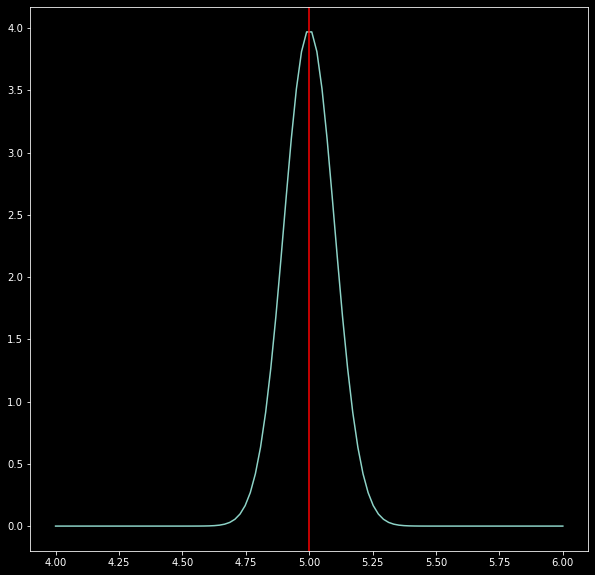

In [23]:
nrows, ncols = 1, 1
fig1 = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(nrows, ncols, figure=fig1)
ax1 = fig1.add_subplot(gs[0, 0])

ax1.plot(x, gaussian)
ax1.axvline(mean, color="r")

In [25]:
norm(loc=mean , scale=stddev).cdf(5)

0.5